<a href="https://colab.research.google.com/github/prahladpunia/AI/blob/main/IMAGEDATAGENERATOR_HORSE_HUMANS_APR_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TENSOR FLOW IMAGE GENERATOR CNN HORSE OR HUMANS

# Get the Trainig files hore or humans

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /content/drive/MyDrive/tmp/horse-or-human.zip

--2022-04-01 06:38:49--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c0d::80, 2607:f8b0:400e:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/content/drive/MyDrive/tmp/horse-or-human.zip’

/content/drive/MyDr 100%[===================>] 142.65M  72.9MB/s    in 2.0s    

2022-04-01 06:38:51 (72.9 MB/s) - ‘/content/drive/MyDrive/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2022-04-01 06:38:51--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c00::80, 2607:f8b0:400e:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... con

# Get the validation or testing files

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /content/drive/MyDrive/tmp/validation-horse-or-human.zip

--2022-04-01 06:39:03--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.195.128, 2607:f8b0:400e:c0c::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/content/drive/MyDrive/tmp/validation-horse-or-human.zip’

/content/drive/MyDr 100%[===================>]  10.95M  39.7MB/s    in 0.3s    

2022-04-01 06:39:03 (39.7 MB/s) - ‘/content/drive/MyDrive/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



The following python code will use the OS library to use Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data.

In [5]:
import os 
import zipfile

#Extract the Trg datasets

In [6]:
local_zip ='/content/drive/MyDrive/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r') # read the file
zip_ref.extractall('/content/drive/MyDrive/tmp/horse-or-human')

#Extract the validation dataset

In [7]:
local_zip = '/content/drive/MyDrive/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/tmp/validation-horse-or-human')

In [8]:
zip_ref.close() # close the zip_ref file

The contents of the .zip are extracted to the base directory /tmp/horse-or-human, which in turn each contain horses and humans subdirectories.

#Important   
We do not explicitly label the images as horses or humans.     
We use ImageGenerator to read images from subdirectories, and automatically label them from the name of that subdirectory.   
So, for example, you will have a    
- 'training' directory containing a 'horses' directory and a    
- 'humans' one.     
 ImageGenerator will label the images appropriately for you, reducing a coding step.

#Let's define each of these directories:

In [9]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/content/drive/MyDrive/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/content/drive/MyDrive/tmp/horse-or-human/humans')

# Directory with our VALIDATION horse pictures
validation_horse_dir = os.path.join('/content/drive/MyDrive/tmp/validation-horse-or-human/horses')

# Directory with our VALIDATION human pictures
validation_human_dir = os.path.join('/content/drive/MyDrive/tmp/validation-horse-or-human/humans')

#Now, let's see what the filenames look like in the horses and humans training directories:

In [10]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse01-0.png', 'horse01-2.png', 'horse01-1.png', 'horse01-6.png', 'horse01-4.png', 'horse01-5.png', 'horse01-3.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-08.png', 'human01-07.png', 'human01-09.png']
['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-05.png', 'valhuman01-04.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-09.png', 'valhuman01-10.png']


#Let's find out the total number of horse and human images in the directories:

In [11]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


#Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

#Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

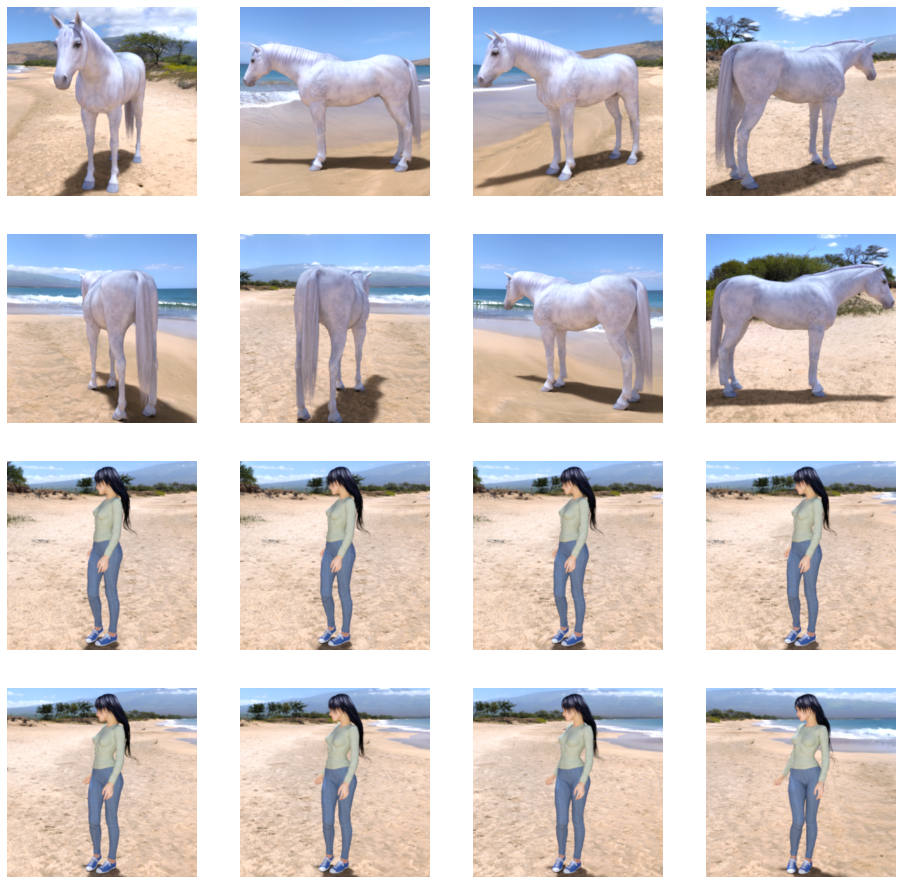

In [13]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#Building a Small Model from Scratch

In [16]:
import tensorflow as tf

In [17]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
#Summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

#Model Training   
- binary_crossentropy loss, because it's a binary classification problem and   
-  final activation is a sigmoid.   
-  optimizer -rmsprop optimizer with a learning rate of 0.001    
-  monitor classification accuracy.

# NOTE:    
- RMSprop optimization algorithm is preferable to SGD -stochastic gradient descent   
- RMSprop automates learning-rate tuning for us.   
- Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.

In [19]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


#Data Preprocessing    
### set up data generators   
- read pictures in our source folders   
-  convert them to float32 tensors    
- and feed them (with their labels) to our network.    
- one generator for the training images   
- one for the validation images.
 Our generators will yield batches of images of size 300x300 and their labels (binary).
- normalize the data  
In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter.      
This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs: fit_generator, evaluate_generator, and predict_generator.

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/tmp/horse-or-human',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [21]:
# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/tmp/validation-horse-or-human',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 256 images belonging to 2 classes.


#Training    
- train for 15 epochs    
- Loss and Accuracy are a great indication of progress of training. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result. Accuracy is the portion of correct guesses.

In [22]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
8/8 [==============================] - 19s 1s/step - loss: 0.9617 - acc: 0.5473 - val_loss: 0.6731 - val_acc: 0.5039
Epoch 2/15
8/8 [==============================] - 8s 964ms/step - loss: 0.8133 - acc: 0.6507 - val_loss: 0.6181 - val_acc: 0.7500
Epoch 3/15
8/8 [==============================] - 8s 964ms/step - loss: 0.7350 - acc: 0.7230 - val_loss: 0.5208 - val_acc: 0.7188
Epoch 4/15
8/8 [==============================] - 8s 936ms/step - loss: 0.6046 - acc: 0.6863 - val_loss: 0.6201 - val_acc: 0.6172
Epoch 5/15
8/8 [==============================] - 8s 940ms/step - loss: 0.4292 - acc: 0.8654 - val_loss: 0.5024 - val_acc: 0.8281
Epoch 6/15
8/8 [==============================] - 7s 927ms/step - loss: 0.3483 - acc: 0.8765 - val_loss: 0.7068 - val_acc: 0.8242
Epoch 7/15
8/8 [==============================] - 7s 929ms/step - loss: 0.1633 - acc: 0.9321 - val_loss: 0.7884 - val_acc: 0.8672
Epoch 8/15
8/8 [==============================] - 7s 932ms/step - loss: 1.0444 - acc: 0.8776

#Running the Model    
- Predict using the model - whether the object is a horse or a human.

In [31]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [32]:
uploaded = files.upload()

MessageError: ignored

In [29]:
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

MessageError: ignored

#Visualizing Intermediate Representations    
Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


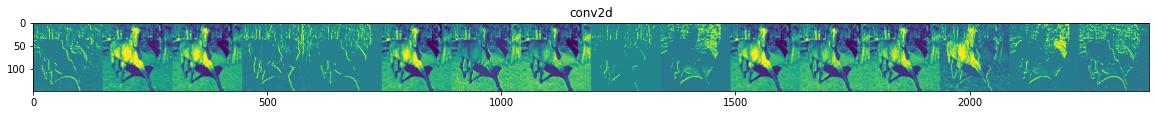

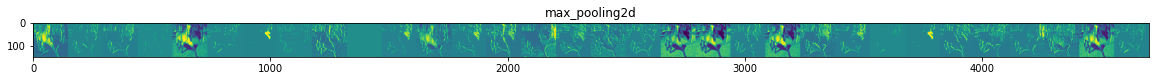

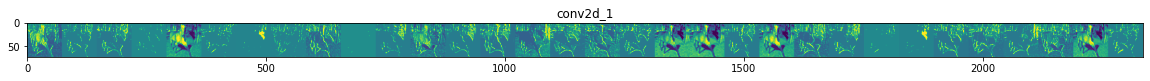

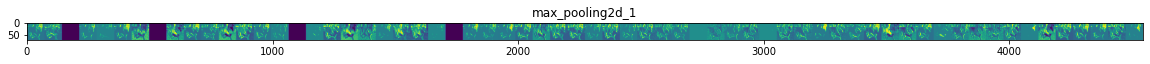

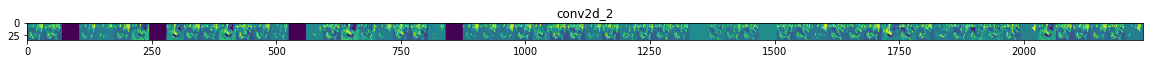

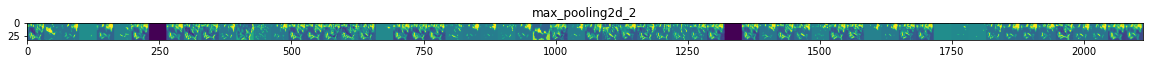

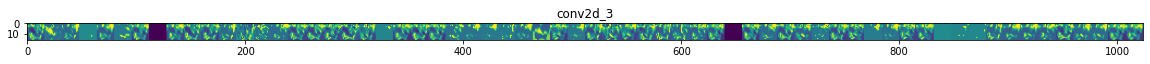

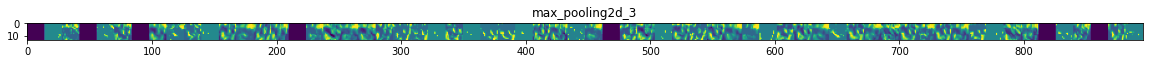

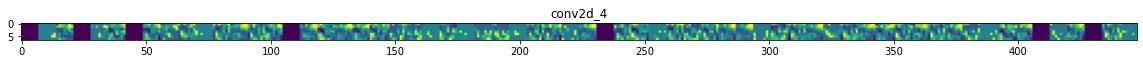

In [30]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
# visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

As you can see we go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.

These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline.

#Clean Up     
Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)